<a href="https://colab.research.google.com/github/PaulMaji1/Scam/blob/main/Copia_de_YOLO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLO //  ROBOFLOW

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.7 MB/s eta 0:00:00


In [18]:
model.save('modelo.h5')

NameError: name 'model' is not defined

In [ ]:
#Acceso a GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


#Instalar YOLO11 a través de Ultralytics

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
Setup complete ✅ (96 CPUs, 334.6 GB RAM, 16.0/225.3 GB disk)


#Inferencia con modelo entrenado previamente en el conjunto de datos COCO

#SDK

NOTA: La interfaz Python de YOLO permite una integración perfecta en sus proyectos Python, lo que facilita la carga, ejecución y procesamiento de la salida del modelo.

In [ ]:
from ultralytics import YOLO
from IPython.display import Image


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tzGsryFYvOQsqdXB0Wsx")
project = rf.workspace("uce-nvm2j").project("landslide-znoqj-i5jx9")
version = project.version(3)
dataset = version.download("yolov8")





loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Landslide-3 in yolov8:: 100%|██████████| 2419/2419 [00:00<00:00, 6324.63it/s]


In [ ]:
dataset.location

'/content/Landslide-3'

#Entrenar con un modelo YOLO11 personalizado

In [ ]:
!yolo task=segment mode=train data= {dataset.location}/data.yaml model="yolov8n-seg.pt" batch=64 epochs=10 imgsz=640

100% 6.74M/6.74M [00:00<00:00, 75.7MB/s]
New https://pypi.org/project/ultralytics/8.3.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Landslide-3/data.yaml, epochs=10, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

#Examinar los resultados de entrenamiento

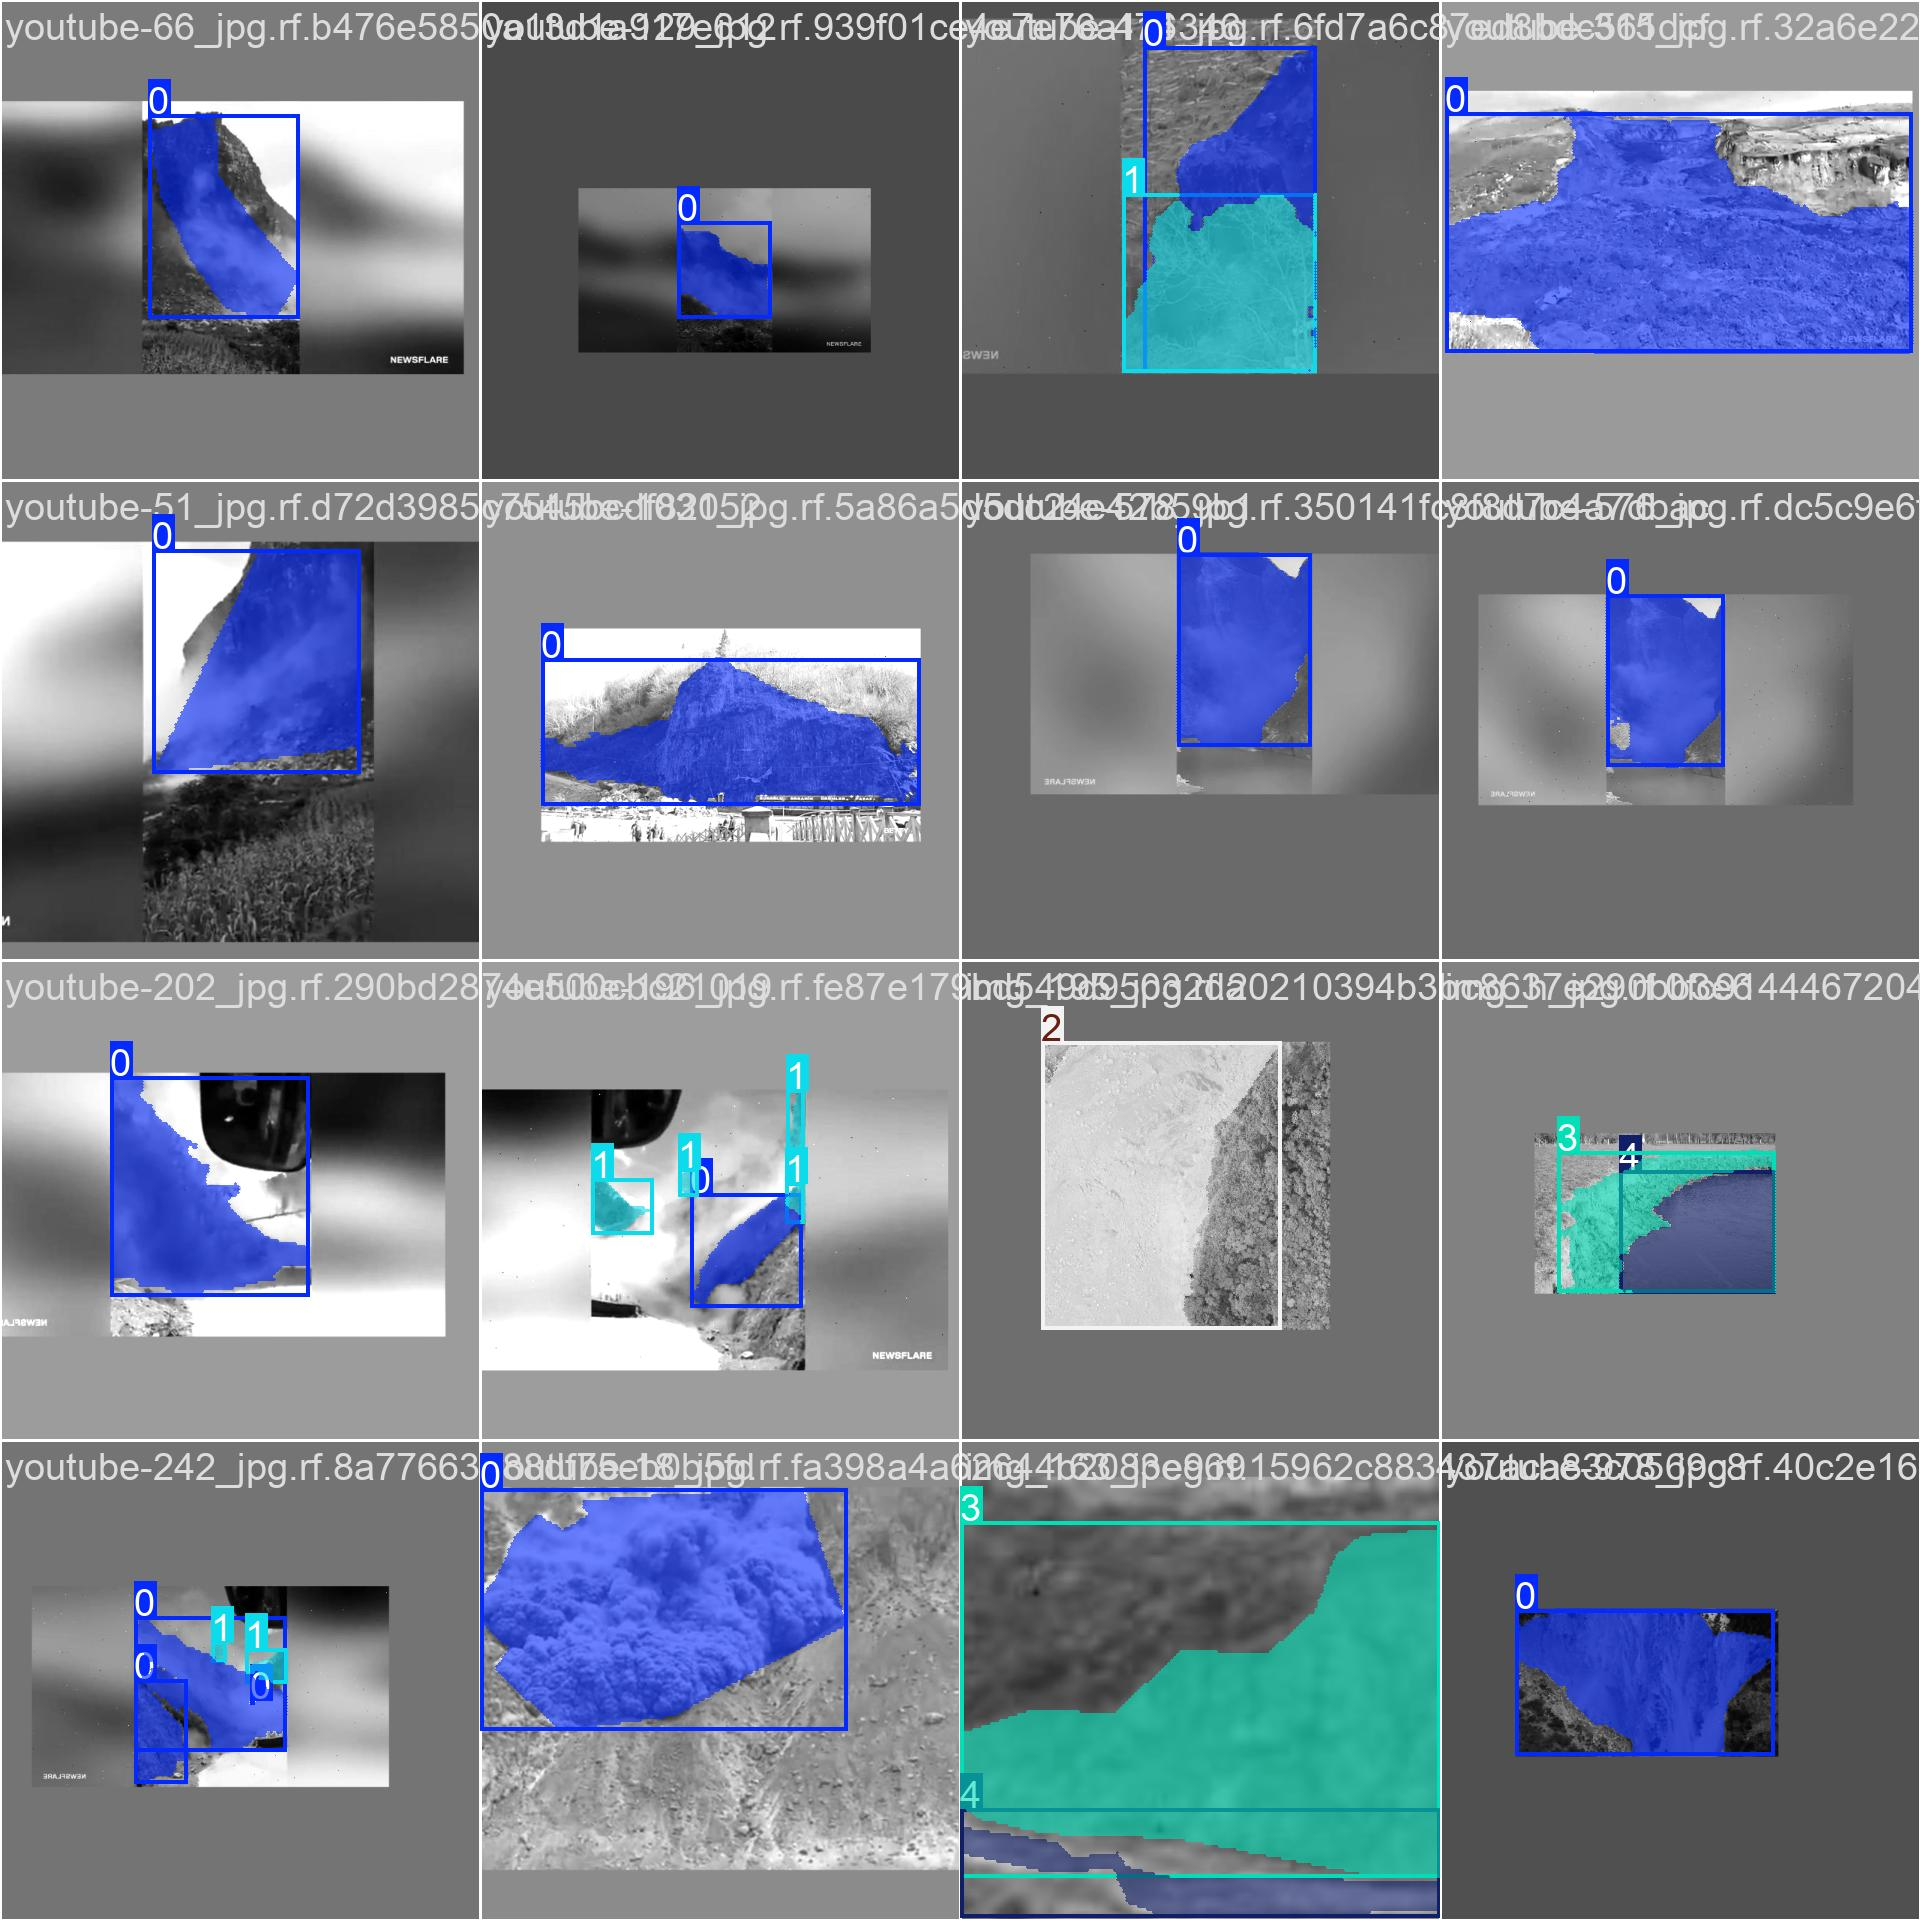

In [ ]:
Image("/content/runs/segment/train/train_batch0.jpg", width=600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: Mountpoint must not already contain files

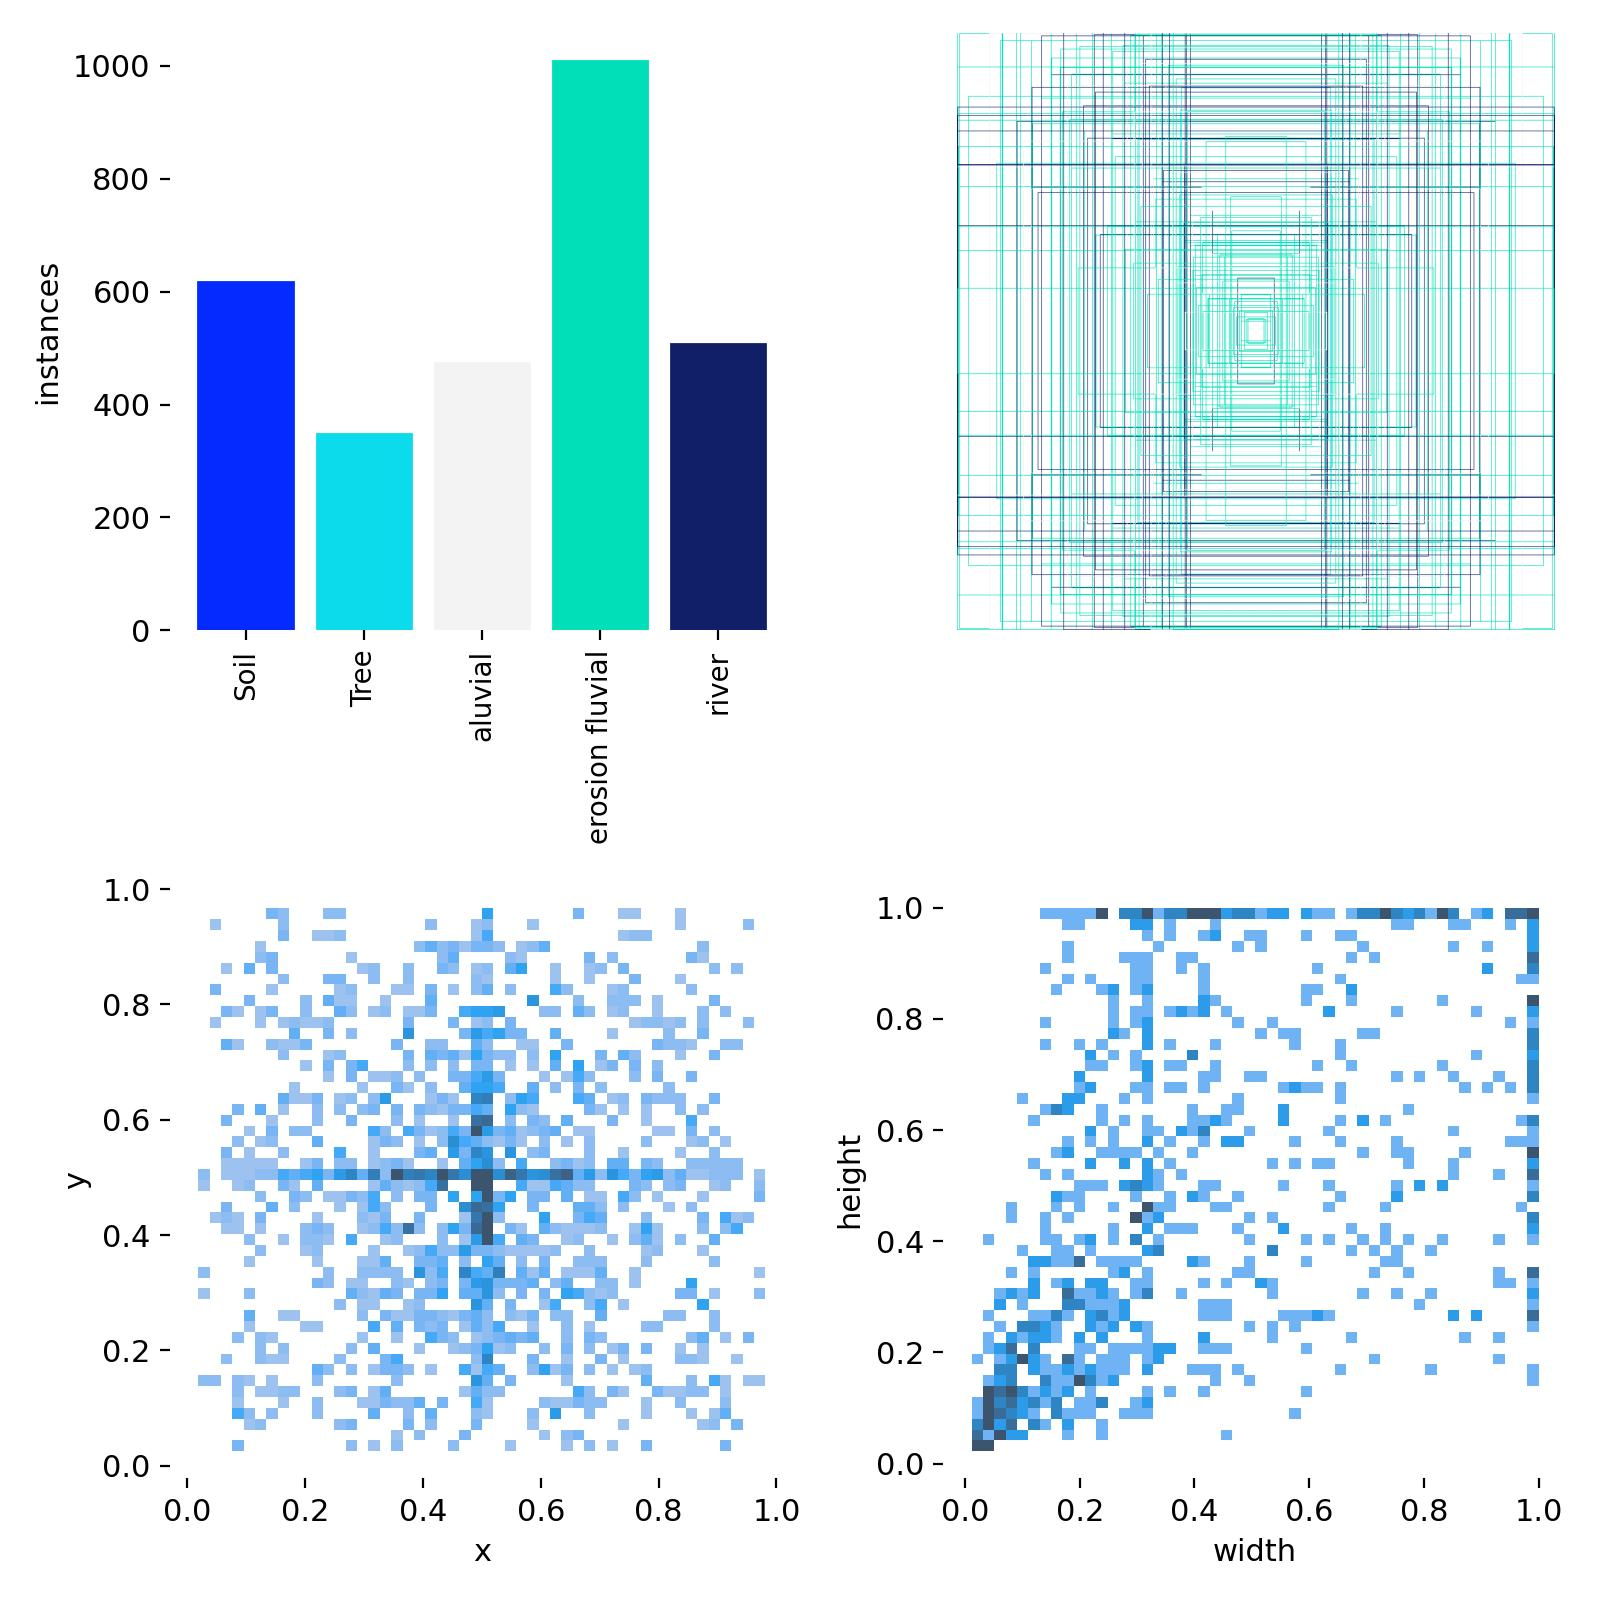

In [ ]:
Image("/content/runs/segment/train/labels.jpg", width=600)

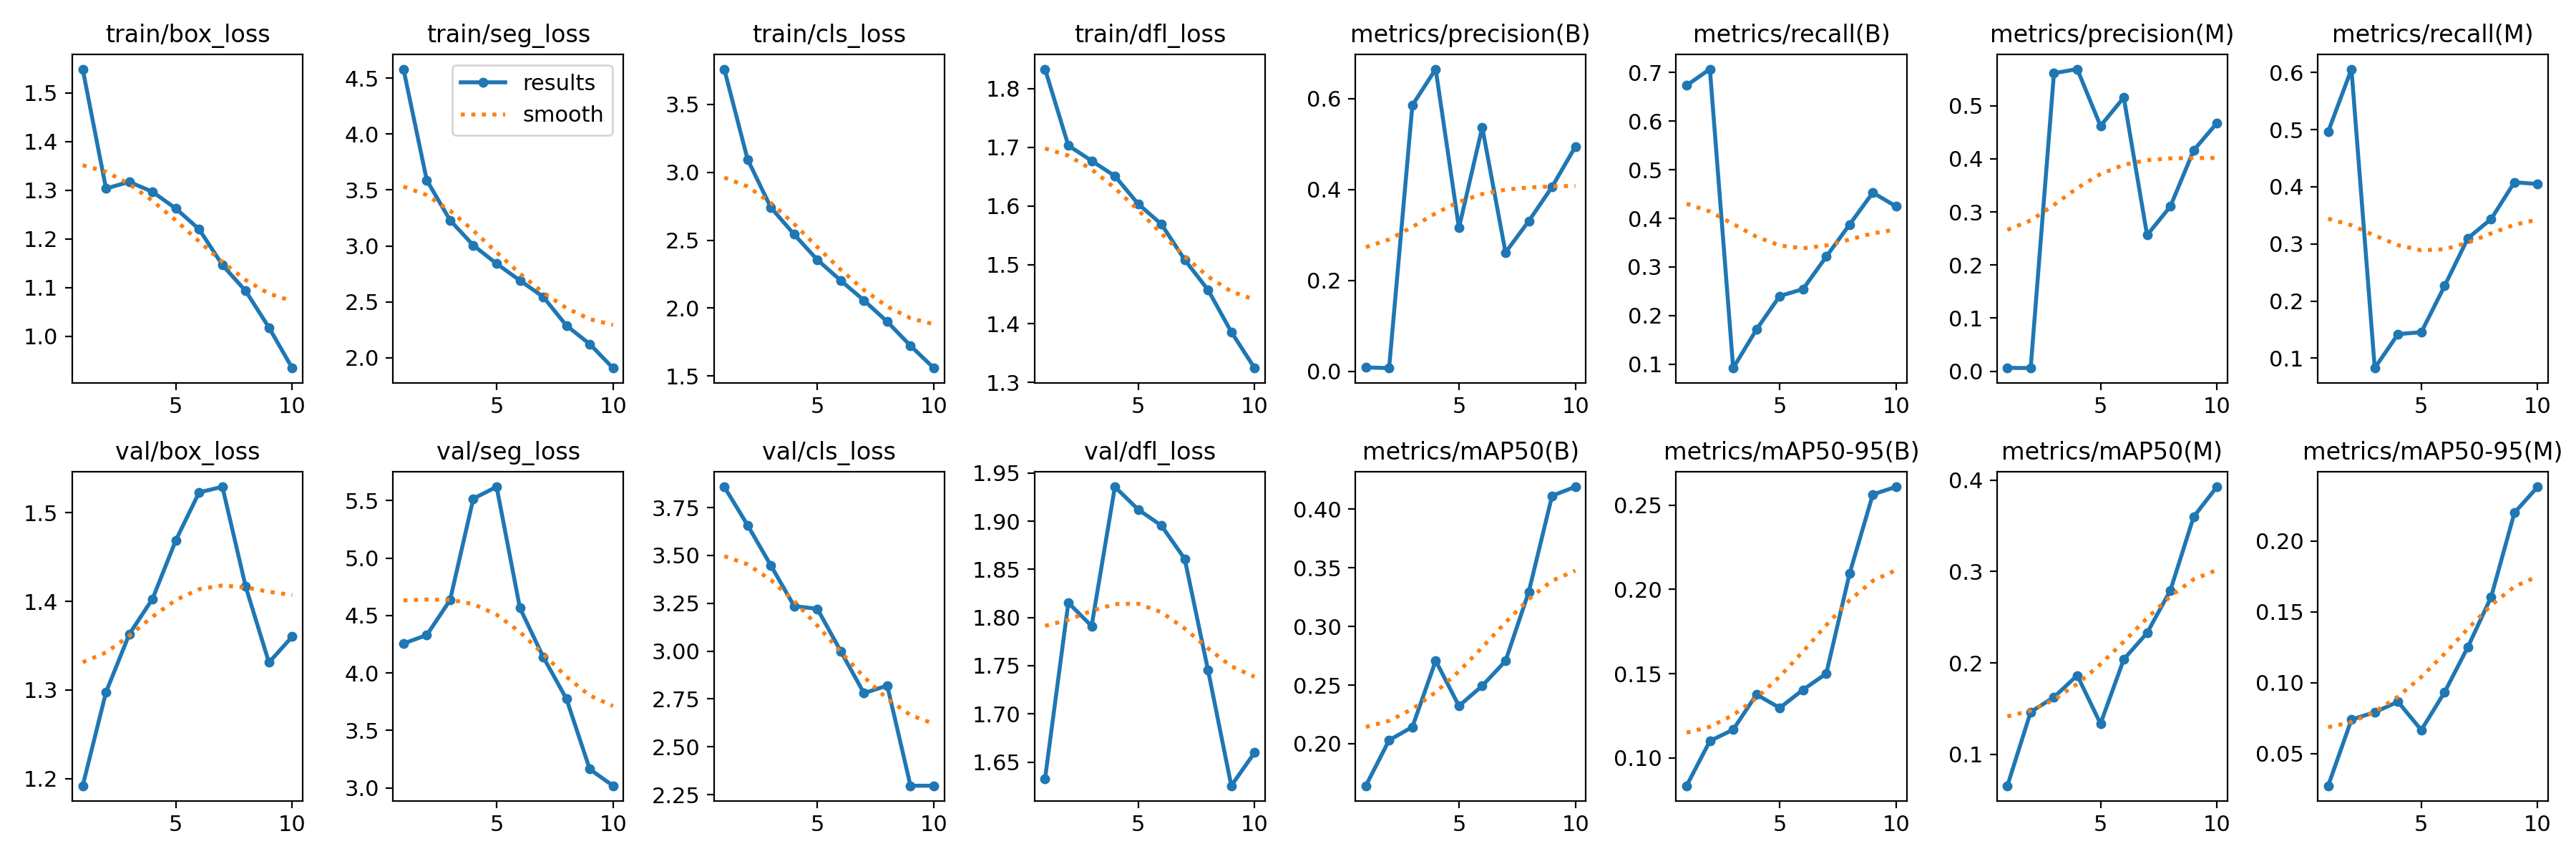

In [ ]:
Image("/content/runs/segment/train/results.png", width=1000)

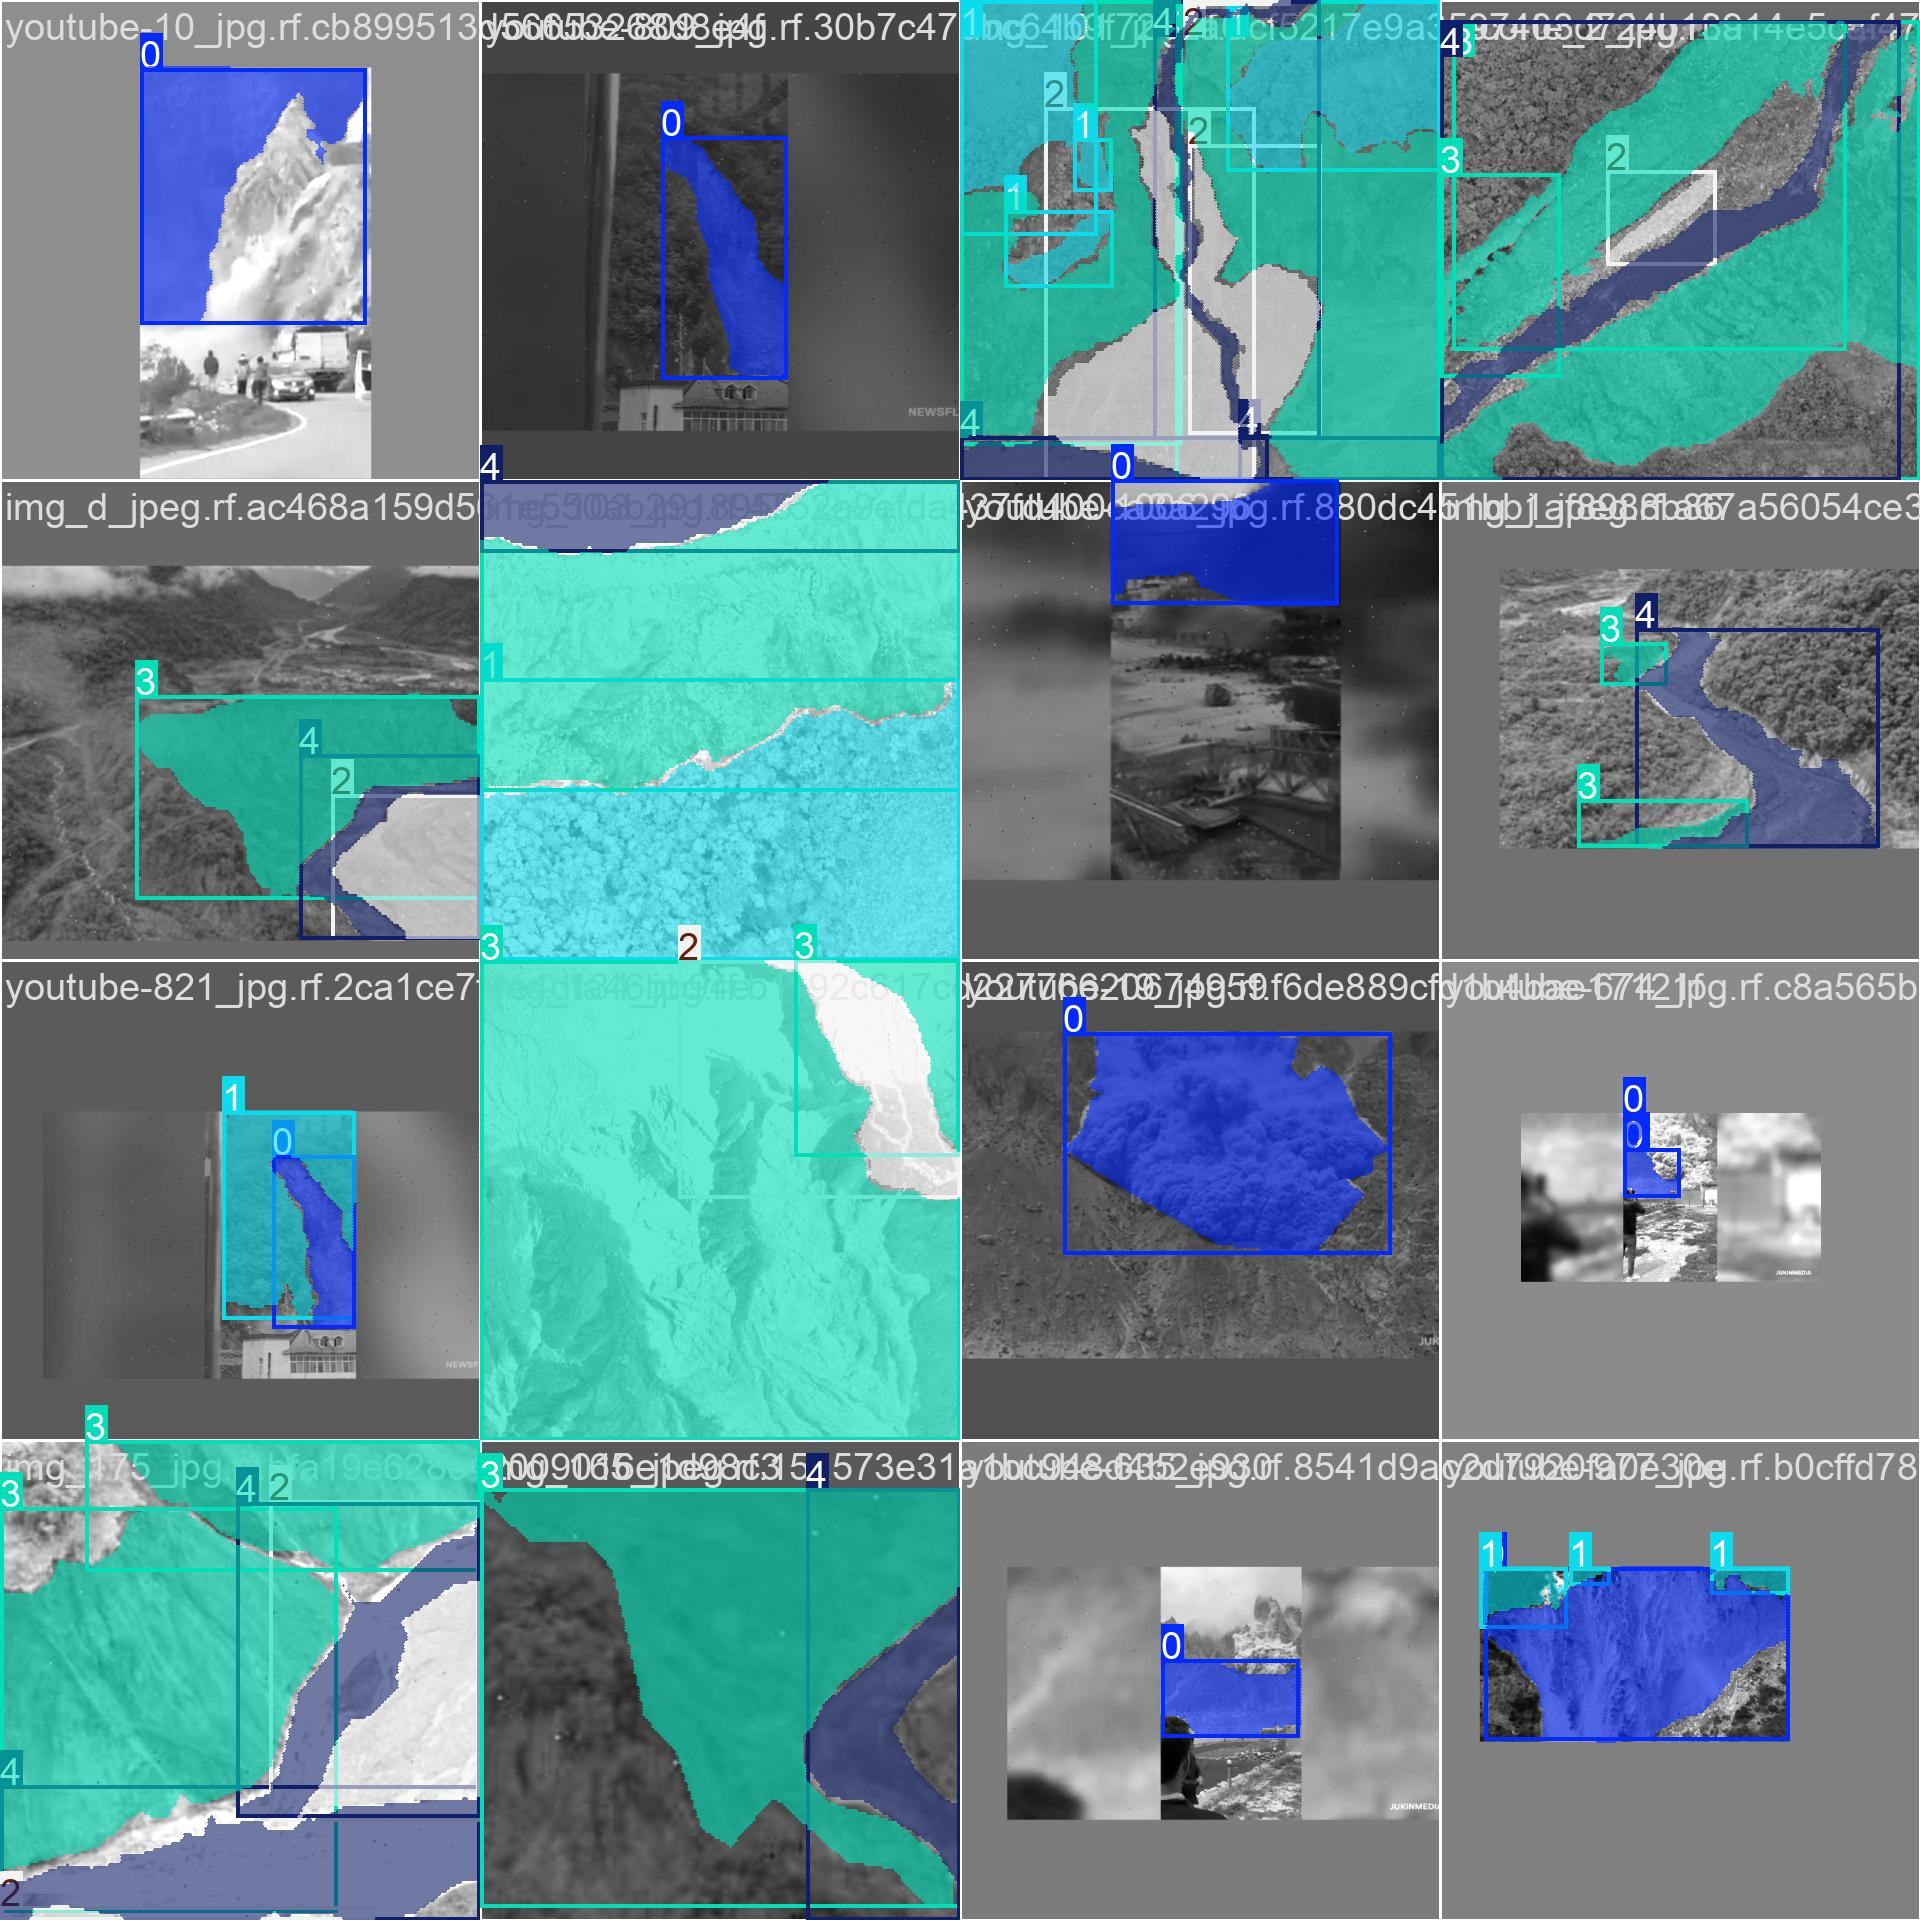

In [ ]:
Image("/content/runs/segment/train/train_batch2.jpg", width=600)

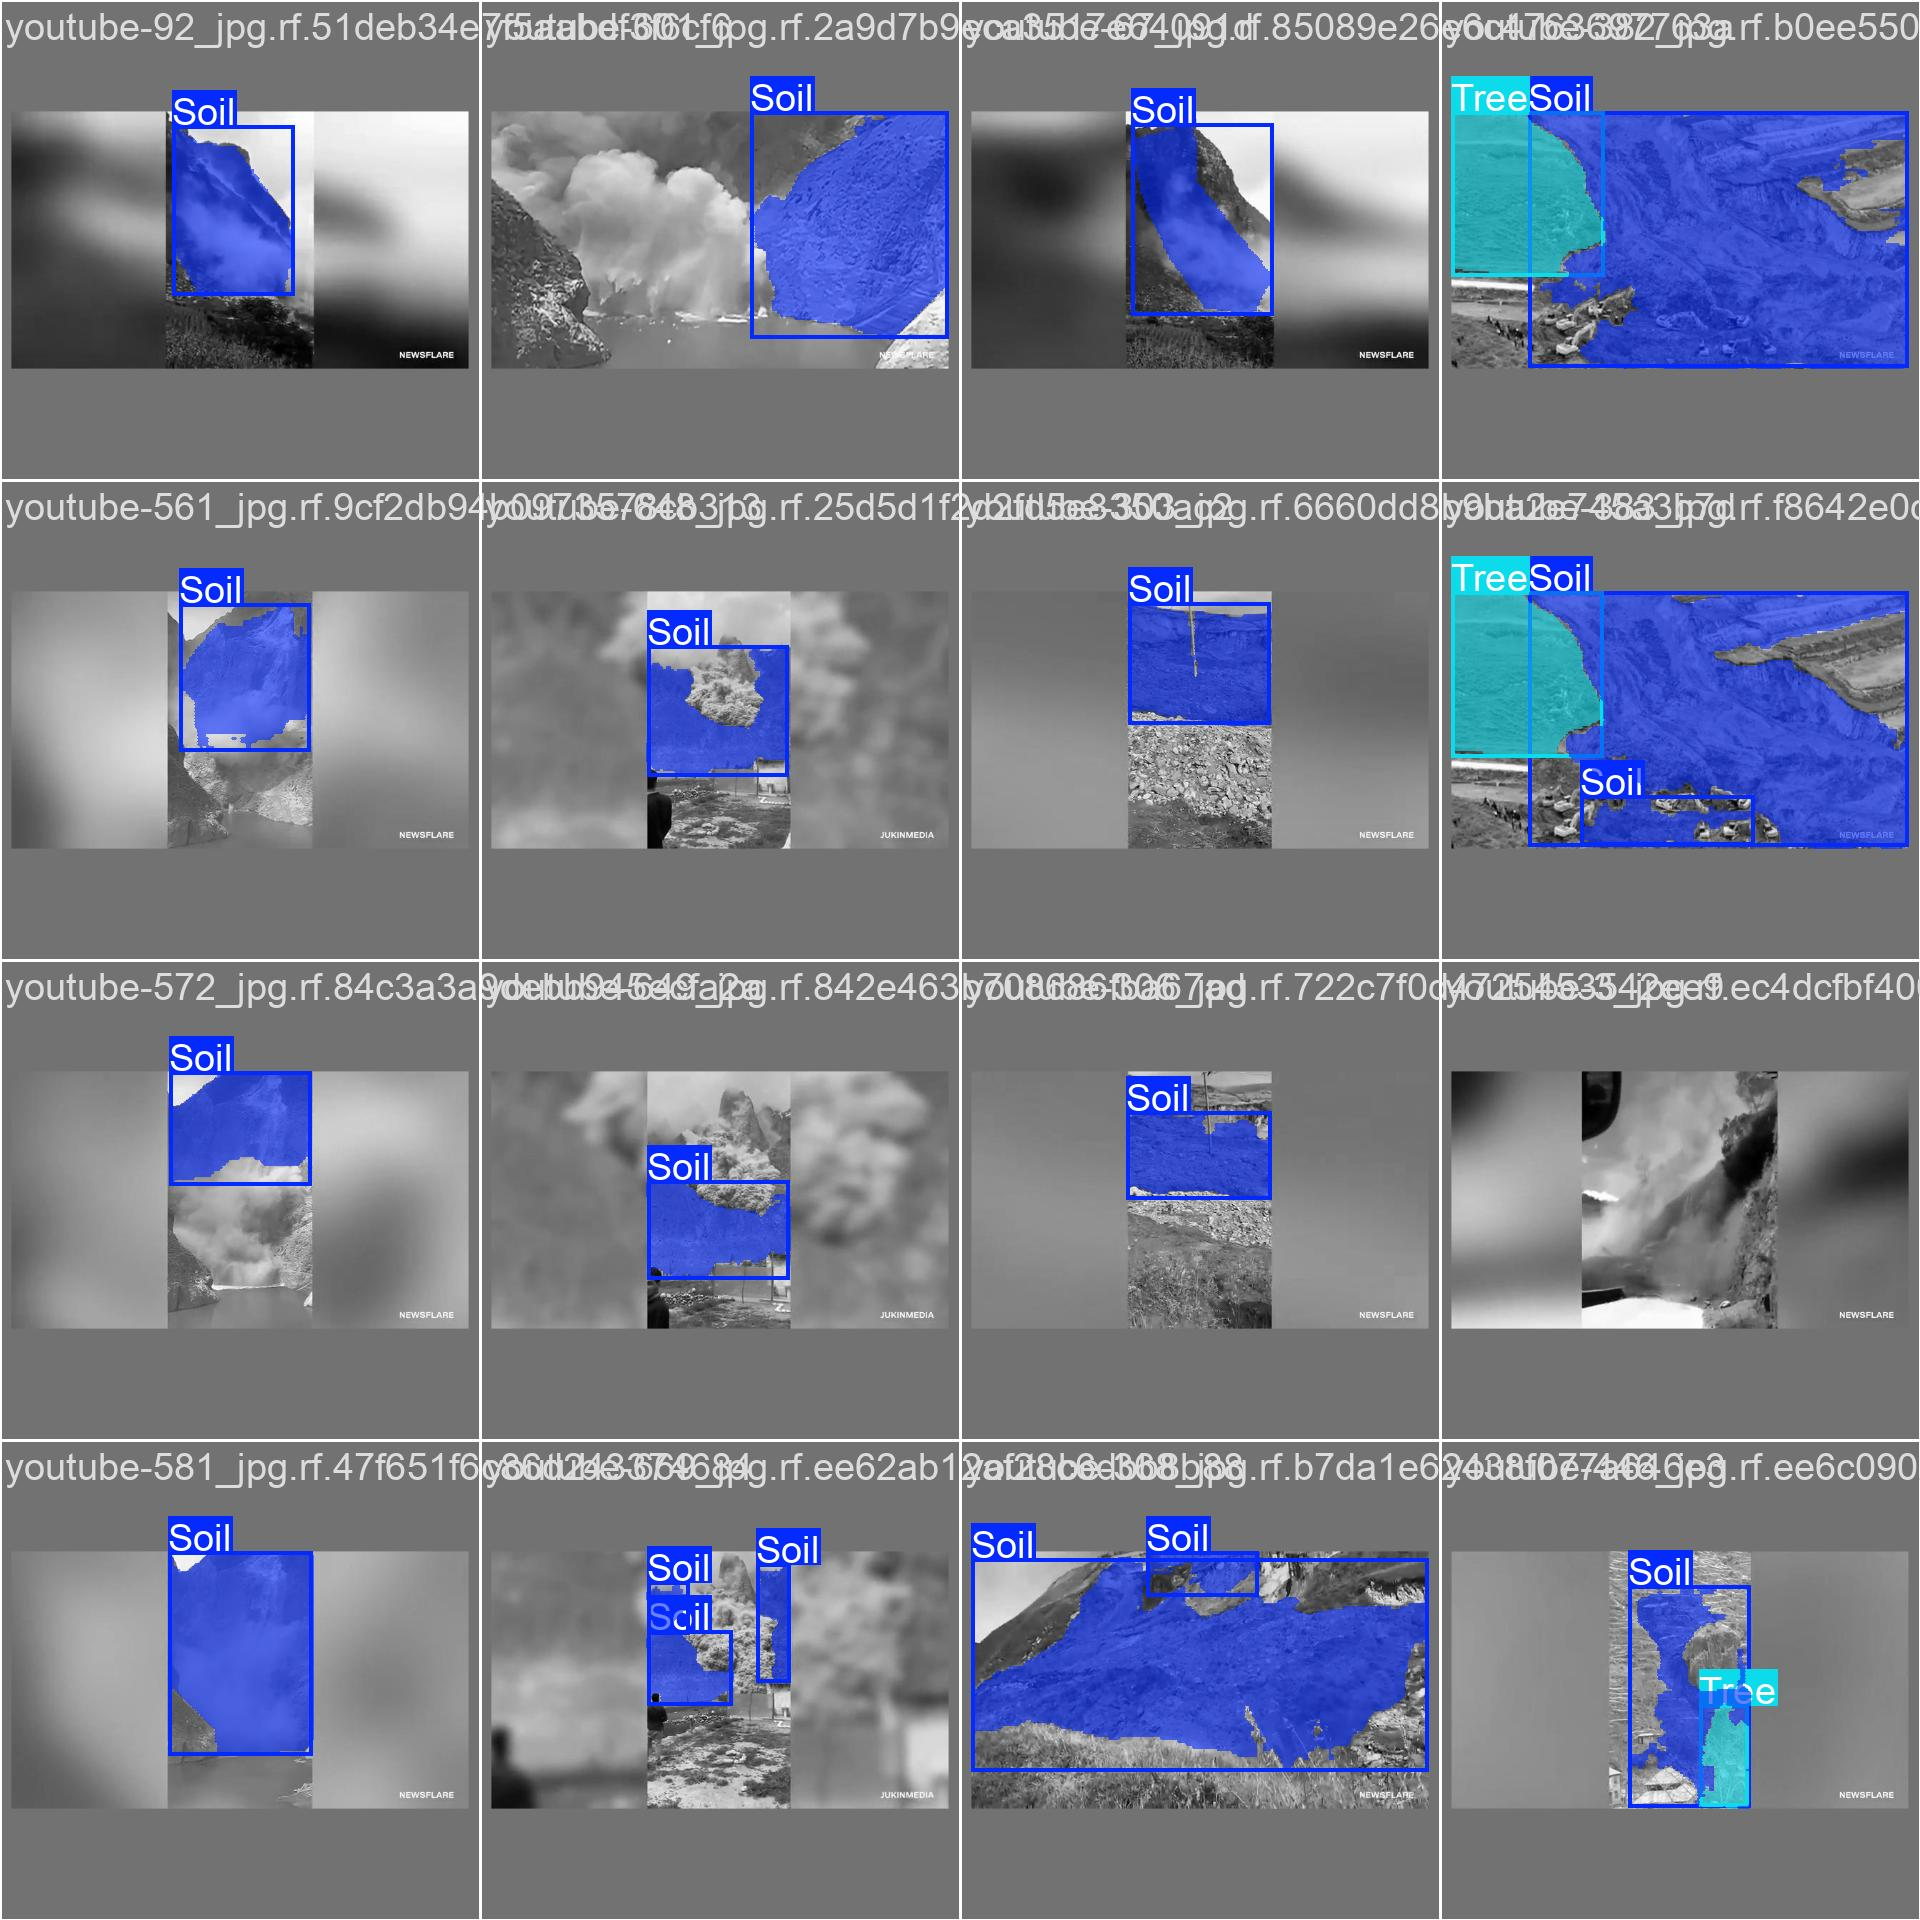

In [ ]:
Image("/content/runs/segment/train/val_batch0_labels.jpg", width=1000)

#validar el modelo ajustado

In [ ]:
!yolo task=segment mode=val model="/content/runs/segment/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
YOLOv8n-seg summary (fused): 195 layers, 3,259,039 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/Landslide-3/valid/labels.cache... 74 images, 2 backgrounds, 0 corrupt: 100% 74/74 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 5/5 [00:10<00:00,  2.13s/it]
                   all         74        178      0.505      0.429      0.422      0.263       0.49      0.419      0.402      0.239
                  Soil         35         41      0.729      0.732      0.779      0.452      0.704      0.707       0.75      0.384
                  Tree         10         12       0.32      0.314      0.156     0.0898      0.321      0.316      0.156     0.0927
               aluvial         15         28      0.205      0.179      0.133     0.0623      0.205      0.179      0.112     0.0491
       erosio

#Inferencia con un modelo personalizado en imagenes

In [ ]:
!yolo task=segment mode=predict model="/content/runs/segment/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
YOLOv8n-seg summary (fused): 195 layers, 3,259,039 parameters, 0 gradients, 12.0 GFLOPs

image 1/74 /content/Landslide-3/test/images/imagen_003_jpeg.rf.098b5ad4c21c2f054388b2b2c13721e3.jpg: 480x640 3 erosion fluvials, 1 river, 159.5ms
image 2/74 /content/Landslide-3/test/images/imagen_004_jpeg.rf.812f612ee3ba17cc73f7c0f7fe102f5a.jpg: 448x640 2 erosion fluvials, 179.1ms
image 3/74 /content/Landslide-3/test/images/img_019_jpg.rf.9166853ed23542ea02385a1fb9fdd705.jpg: 640x640 3 aluvials, 3 erosion fluvials, 195.9ms
image 4/74 /content/Landslide-3/test/images/img_021_jpg.rf.3eaf14f212a35888c5c0fe6930b7c4a4.jpg: 640x640 1 Tree, 1 erosion fluvial, 109.7ms
image 5/74 /content/Landslide-3/test/images/img_027_jpg.rf.2dbe5352d320c7397a0e92d5bbe7c635.jpg: 640x640 1 Tree, 1 erosion fluvial, 1 river, 161.5ms
image 6/74 /content/Landslide-3/test/images/img_035_jpg.rf.c46a367cf6cf242f76062d5dcc2036e4.jpg: 640x640 4 aluvials, 

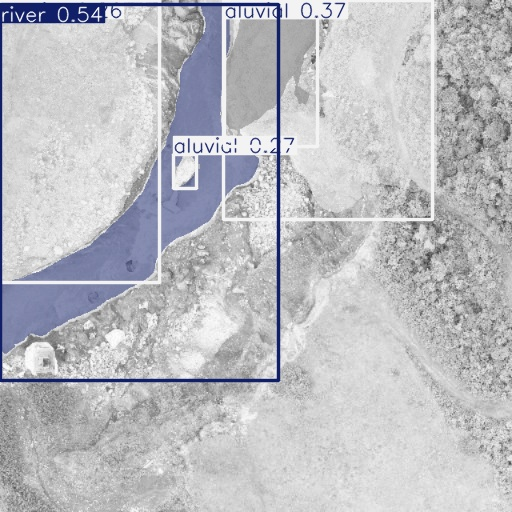

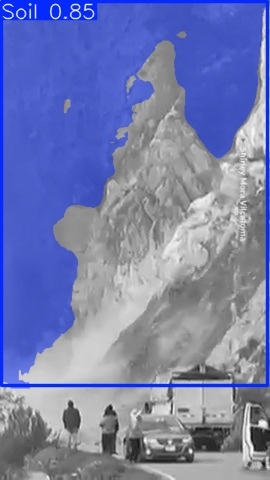

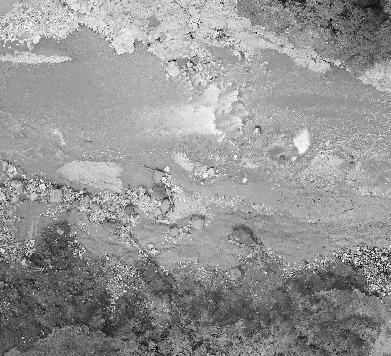

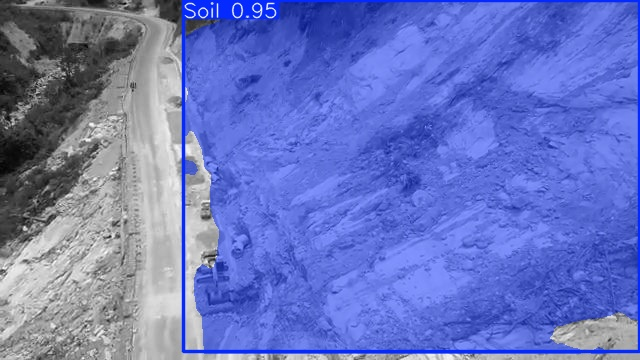

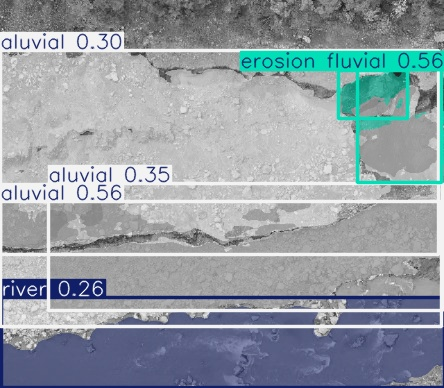

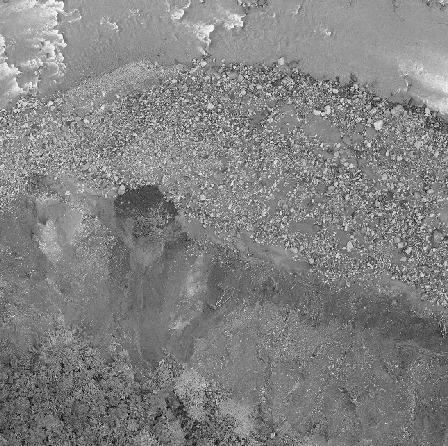

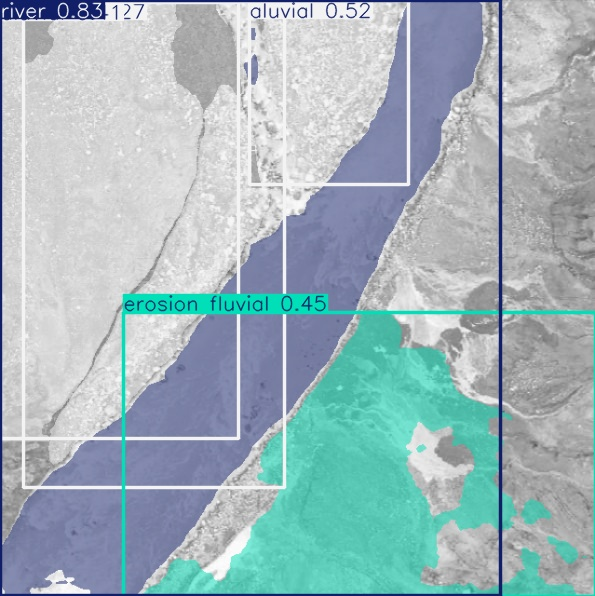

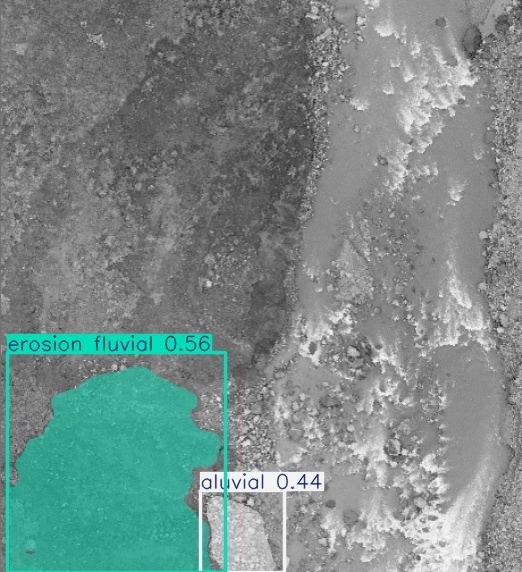

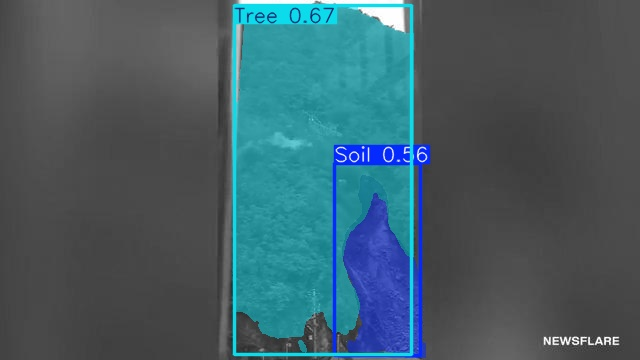

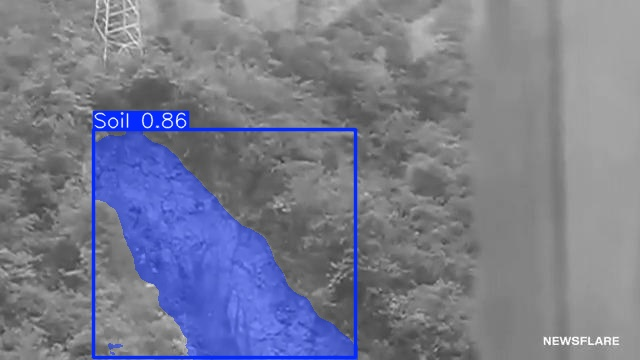

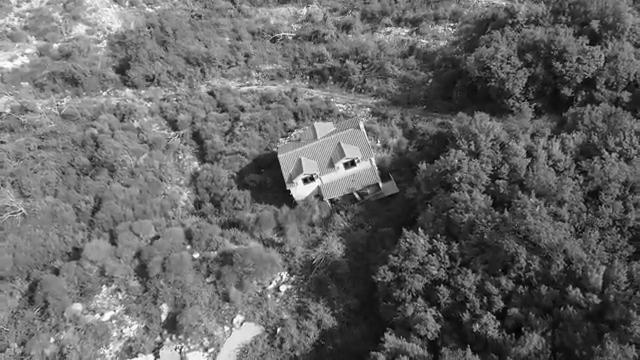

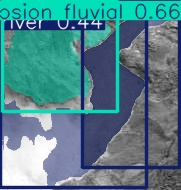

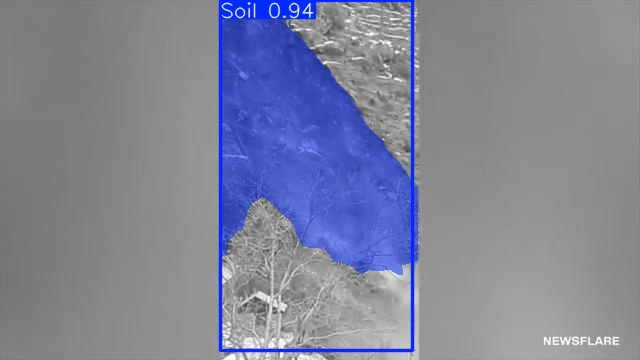

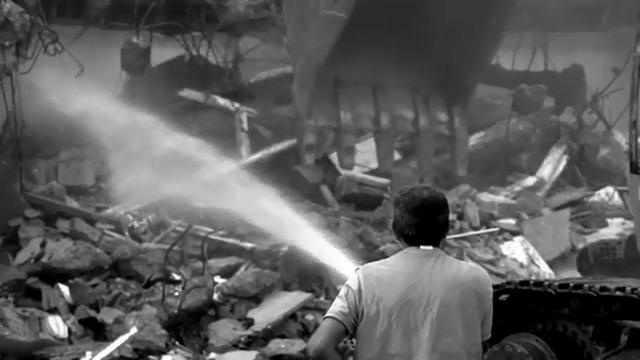

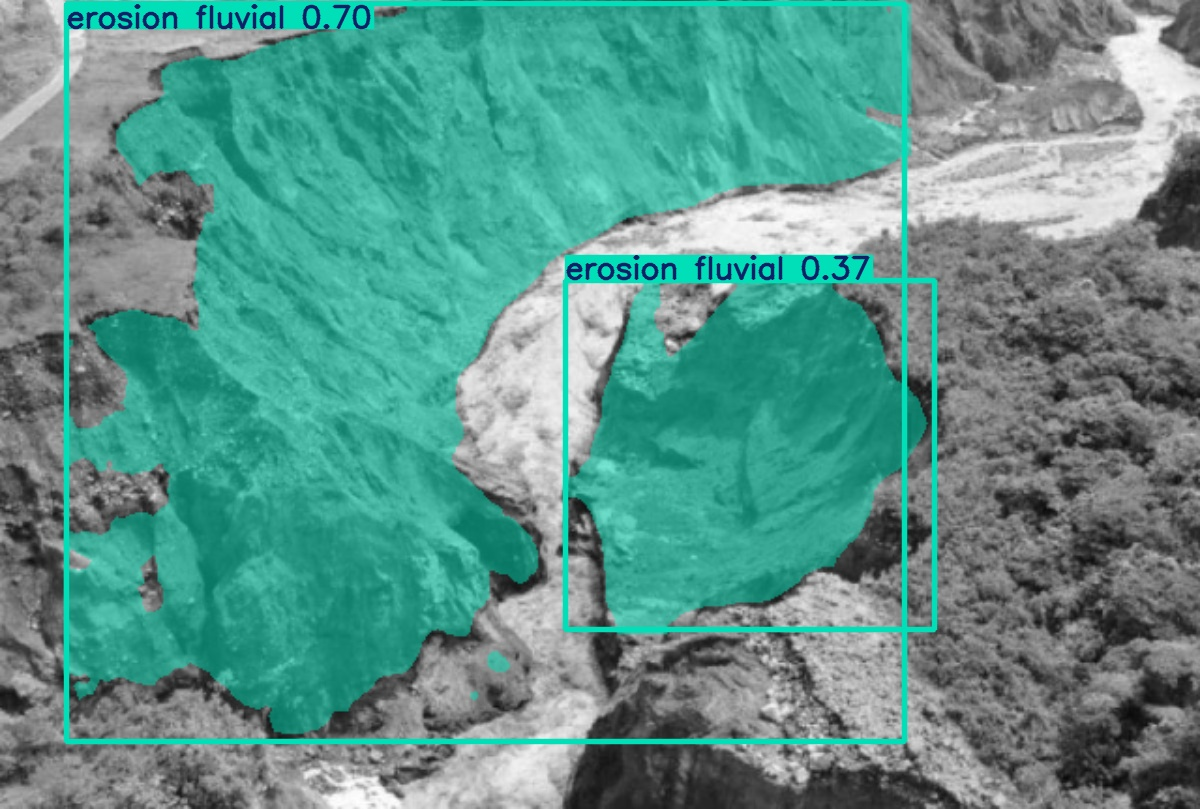

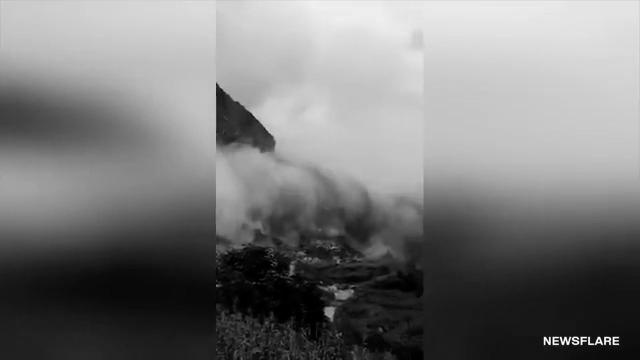

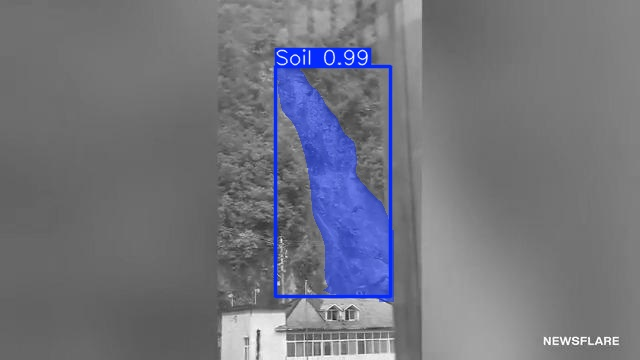

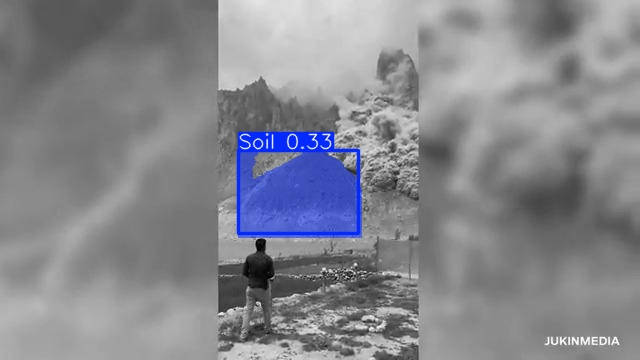

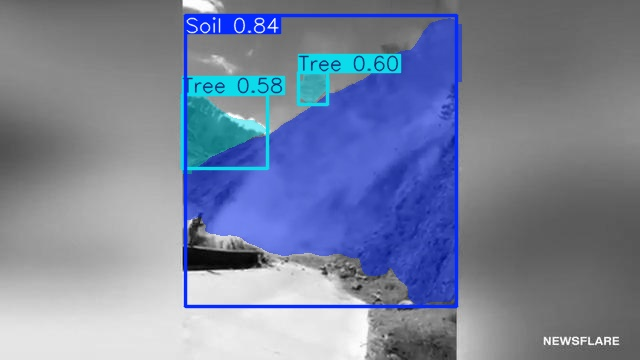

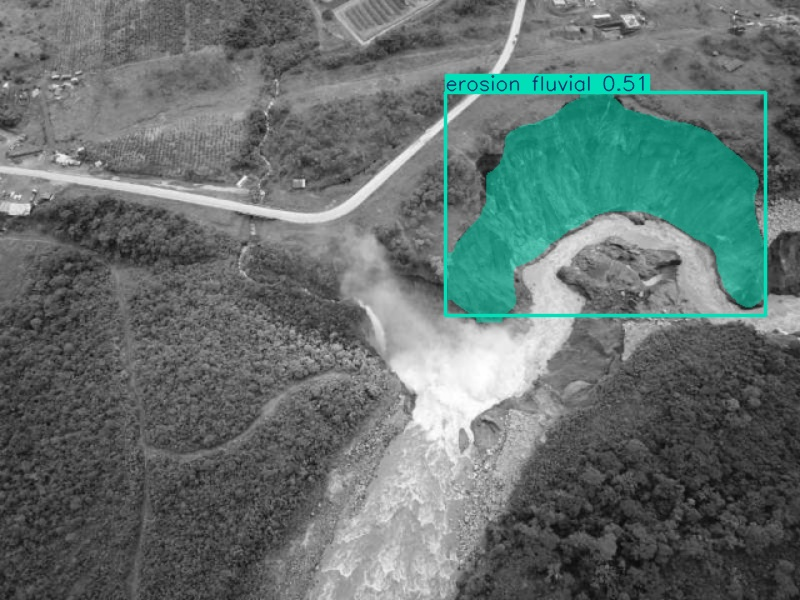

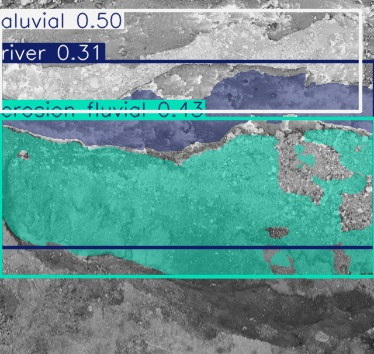

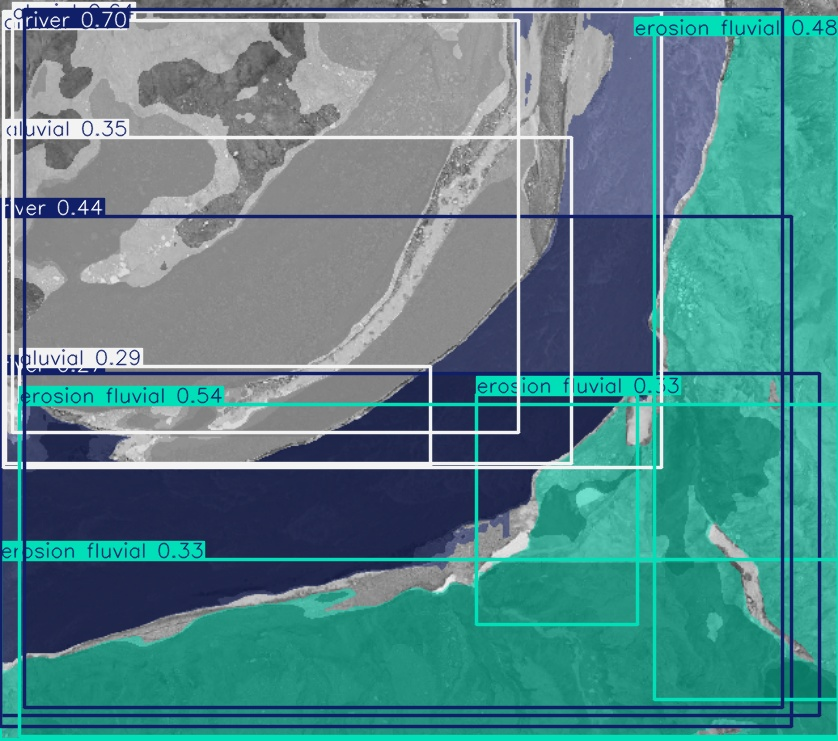

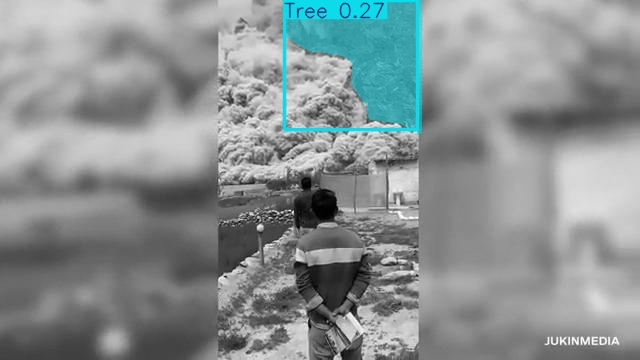

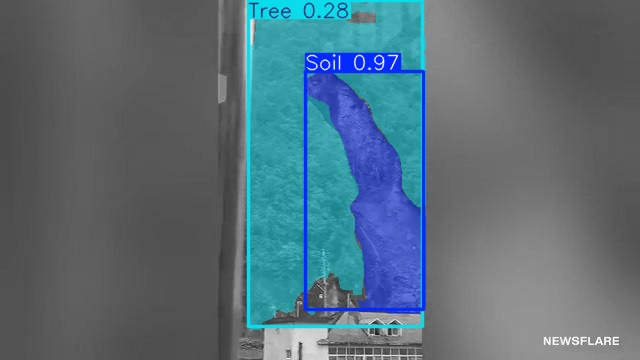

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:25]:
    display(IPyImage(filename=img, width=600))
    print("\n")

#descargar carpeta virtual


In [ ]:
import shutil
from google.colab import files

# Especifica el nombre de la carpeta que quieres comprimir (por ejemplo, 'mi_carpeta')
carpeta = '/content/runs'  # Cambia esto por el path correcto de tu carpeta

# Comprime la carpeta en un archivo .zip
shutil.make_archive('/content/runs', 'zip', carpeta)

# Descarga el archivo comprimido
files.download('/content/runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import shutil
from google.colab import files

# Especifica el nombre de la carpeta que quieres comprimir (por ejemplo, 'mi_carpeta')
carpeta = '/content/Landslide-3'  # Cambia esto por el path correcto de tu carpeta

# Comprime la carpeta en un archivo .zip
shutil.make_archive('/content/Landslide-3', 'zip', carpeta)

# Descarga el archivo comprimido
files.download('/content/Landslide-3')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#descargar máscaras

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
import os

# Cargar tu modelo entrenado de YOLOv8
modelo = YOLO('/content/runs/segment/train/weights/best.pt')  # Cambia esta ruta por la de tu modelo entrenado

# Crear un directorio para guardar las máscaras
output_dir = '/content/drive/MyDrive/DATASET_FINAL/mascara'
os.makedirs(output_dir, exist_ok=True)

# Cargar la imagen que deseas procesar
imagen_path = '/content/Landslide-2/test/images/img_019_jpg.rf.9166853ed23542ea02385a1fb9fdd705.jpg'  # Cambia esto por el path de tu imagen
imagen = cv2.imread(imagen_path)

# Verificar si la imagen se cargó correctamente
if imagen is None:
    raise ValueError(f"No se pudo cargar la imagen en la ruta: {imagen_path}")

# Realizar la predicción
resultados = modelo(imagen)  # Predicciones de la imagen

# Procesar los resultados
for i, result in enumerate(resultados):
    if result.masks is not None:
        for idx, mask in enumerate(result.masks.data):  # Acceder a la data de la máscara
            print(f"Procesando máscara {i} - Segmento {idx}, forma: {mask.shape}")

            # Convertir tensor de PyTorch a NumPy
            mascara_np = mask.cpu().numpy().astype(np.uint8) * 255  # Escalar a 255

            # Asegurar que la máscara tenga 2D (remover dimensión extra si es necesario)
            if len(mascara_np.shape) == 3:
                mascara_np = mascara_np[0]

            # Redimensionar la máscara al tamaño de la imagen original
            mascara_resized = cv2.resize(mascara_np, (imagen.shape[1], imagen.shape[0]))

            # Guardar la máscara
            mascara_filename = os.path.join(output_dir, f'mascara_{i}_{idx}.png')
            cv2.imwrite(mascara_filename, mascara_resized)
            print(f'Máscara guardada en: {mascara_filename}')


0: 640x640 3 aluvials, 3 erosion fluvials, 161.2ms
Speed: 5.3ms preprocess, 161.2ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)
Procesando máscara 0 - Segmento 0, forma: torch.Size([640, 640])
Máscara guardada en: /content/drive/MyDrive/DATASET_FINAL/mascara/mascara_0_0.png
Procesando máscara 0 - Segmento 1, forma: torch.Size([640, 640])
Máscara guardada en: /content/drive/MyDrive/DATASET_FINAL/mascara/mascara_0_1.png
Procesando máscara 0 - Segmento 2, forma: torch.Size([640, 640])
Máscara guardada en: /content/drive/MyDrive/DATASET_FINAL/mascara/mascara_0_2.png
Procesando máscara 0 - Segmento 3, forma: torch.Size([640, 640])
Máscara guardada en: /content/drive/MyDrive/DATASET_FINAL/mascara/mascara_0_3.png
Procesando máscara 0 - Segmento 4, forma: torch.Size([640, 640])
Máscara guardada en: /content/drive/MyDrive/DATASET_FINAL/mascara/mascara_0_4.png
Procesando máscara 0 - Segmento 5, forma: torch.Size([640, 640])
Máscara guardada en: /content/drive/MyDrive/DATASE

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
import os

# Cargar tu modelo entrenado de YOLOv8
modelo = YOLO('/content/runs/segment/train/weights/best.pt')  # Cambia esta ruta por la de tu modelo entrenado

# Crear un directorio para guardar las máscaras
output_dir = '/content/drive/MyDrive/DATASET_FINAL/mascara'
os.makedirs(output_dir, exist_ok=True)

# Cargar la imagen que deseas procesar
imagen_path = '/content/Landslide-2/test/images/img_019_jpg.rf.9166853ed23542ea02385a1fb9fdd705.jpg'  # Cambia esto por el path de tu imagen
imagen = cv2.imread(imagen_path)

# Realizar la predicción
resultados = modelo(imagen)  # Predicciones de la imagen

# Extraer las mascaras de segmentación
for i, result in enumerate(resultados):
    # Verifica si la predicción tiene una máscara de segmentación
    if result.masks is not None:
        # Iterar sobre las máscaras de segmentación
        for idx, mask in enumerate(result.masks):
            # Verificar la forma de la máscara para asegurarnos de que es poligonal
            print(f"Máscara {i} - Segmento {idx} tiene forma: {mask.shape}")

            # Convierte la máscara en un array binario
            mascara = mask.numpy()  # Obtiene la máscara en formato poligonal

            # Crear una imagen en blanco (tamaño de la imagen original)
            mascara_binaria = np.zeros((imagen.shape[0], imagen.shape[1]), dtype=np.uint8)

            # Iterar sobre las coordenadas de cada polígono y llenar la máscara binaria
            for segment in mascara:
                # Asegurarnos de que el segment sea una lista de coordenadas (2D)
                if len(segment) > 0 and isinstance(segment[0], list):
                    # Convertir las coordenadas del polígono a un formato de array de numpy
                    pts = np.array(segment[0], dtype=np.int32)
                    cv2.fillPoly(mascara_binaria, [pts], 255)  # Llena el polígono en la máscara
                else:
                    # Si la máscara no tiene la estructura correcta, evitarla
                    print("Error: Segmento no tiene la forma esperada.")

            # Guardar la máscara como una imagen
            mascara_filename = os.path.join(output_dir, f'mascara_{i}_{idx}.png')
            cv2.imwrite(mascara_filename, mascara_binaria)
            print(f'Máscara guardada en: {mascara_filename}')


0: 640x640 3 aluvials, 3 erosion fluvials, 114.2ms
Speed: 2.9ms preprocess, 114.2ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
Máscara 0 - Segmento 0 tiene forma: torch.Size([1, 640, 640])
Error: Segmento no tiene la forma esperada.
Máscara guardada en: /content/drive/MyDrive/DATASET_FINAL/mascara/mascara_0_0.png
Máscara 0 - Segmento 1 tiene forma: torch.Size([1, 640, 640])
Error: Segmento no tiene la forma esperada.
Máscara guardada en: /content/drive/MyDrive/DATASET_FINAL/mascara/mascara_0_1.png
Máscara 0 - Segmento 2 tiene forma: torch.Size([1, 640, 640])
Error: Segmento no tiene la forma esperada.
Máscara guardada en: /content/drive/MyDrive/DATASET_FINAL/mascara/mascara_0_2.png
Máscara 0 - Segmento 3 tiene forma: torch.Size([1, 640, 640])
Error: Segmento no tiene la forma esperada.
Máscara guardada en: /content/drive/MyDrive/DATASET_FINAL/mascara/mascara_0_3.png
Máscara 0 - Segmento 4 tiene forma: torch.Size([1, 640, 640])
Error: Segmento no tiene la forma es